### Готовим LDA по рецептам
Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули ```json``` и ```gensim```. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

```pip install gensim```

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.


In [345]:
import json
from gensim import corpora, models
import numpy as np


### Загрузка данных
Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [346]:
cd C:\Users\vlad\1. Machine Learning\Yandex Specialization\3.Unsupervised Learning\data

C:\Users\vlad\1. Machine Learning\Yandex Specialization\3.Unsupervised Learning\data


In [347]:
with open("recipes.json") as f:
    recipes = json.load(f)
    
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [348]:
print('Total Number of Recipes: ', len(recipes))

Total Number of Recipes:  39774


### Составление корпуса

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [349]:
texts = [recipe["ingredients"] for recipe in recipes] # создаем список слов каждого документа (рецепта)
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [198]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели ```show_topics```, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода ```show_topics``` указать параметр ```formatted=True```, то топы ингредиентов будет удобно выводить на печать, если ```formatted=False```, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [201]:
%%time
# Обучаем Модель (берем ldamulticore)
np.random.seed(76543)

# Модели нужно выделить 40 тем из всего множества рецептов 
lda_model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=40, passes=5, workers=4)

Wall time: 27.4 s


In [206]:
# Среди выделенных 40 тем выведем самые популярные, например топ-10 слов для каждой найденной темы
top_words_per_recipe = []
for t, top_words in lda_model.show_topics(num_topics=40, num_words=10, formatted=False):
    top_words_per_recipe.append(top_words)
    
# Взглянем на топы слов 1-ой темы
top_words_per_recipe[0]

[('salt', 0.0349691),
 ('onions', 0.033011828),
 ('garlic cloves', 0.02529485),
 ('olive oil', 0.025144804),
 ('water', 0.024956865),
 ('curry powder', 0.022702279),
 ('vegetable broth', 0.020683654),
 ('carrots', 0.019469772),
 ('tumeric', 0.018765576),
 ('cauliflower', 0.017139578)]

In [207]:
# Считаем сколько раз определенные ингридиенты встретились в топах слов среди всех 40 тем (для удобства создадим функцию)
def count_word_freq_in_tops(word, tops_of_words_in_themes):
    all_words = []
    for topic in tops_of_words_in_themes:
        for top_words in topic:
            all_words.append(top_words[0])
    return all_words.count(word)

In [208]:
words_to_count = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
word_freq = {}

for word in words_to_count:
    word_freq[word] = count_word_freq_in_tops(word, top_words_per_recipe)
    
word_freq

{'salt': 39, 'sugar': 10, 'water': 15, 'mushrooms': 0, 'chicken': 0, 'eggs': 4}

In [209]:
cd C:\Users\vlad\1. Machine Learning\Yandex Specialization\3.Unsupervised Learning\submissions\Theme_Modelling

C:\Users\vlad\1. Machine Learning\Yandex Specialization\3.Unsupervised Learning\submissions\Theme_Modelling


In [210]:
# Сохраняем результат
def save_answers1(words):
    with open("recipes_LDA_task1.txt", "w") as file:
        file.write(" ".join([str(el) for el in words]))
        
save_answers1(word_freq.values())

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — **фильтрация словаря по частоте.**

Обычно словарь фильтруют с двух сторон:
- убирают очень редкие слова (в целях экономии памяти) 
- убирают очень очень частые слова (в целях повышения интерпретируемости тем)

Мы уберем только частые слова.

In [212]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта ```dictionary2``` есть переменная ```dfs``` — это словарь, ключами которого являются ```id``` токена, а элементами — число раз, сколько слово встретилось во всей коллекции.

Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше **4000 раз.** Вызовите метод словаря ```filter_tokens```, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: ```dict_size_before``` и ```dict_size_after``` — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, ```corpus2```, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: ```corpus_size_before``` и ```corpus_size_after``` — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины ```dict_size_before, dict_size_after, corpus_size_before, corpus_size_after``` в функцию ```save_answers2``` и загрузите сгенерированный файл в форму.

In [213]:
# Отберем самые частые слова (больше 4к раз)
too_freq_tokens = []
for token, token_count in dictionary2.dfs.items():
    if token_count > 4000:
        too_freq_tokens.append(token)
        
too_freq_tokens[:3]

[3, 5, 15]

In [214]:
# Взглянем на размеры словарей до и после фильтрации
dict_size_before = len(dictionary2)
print('Dict Size Before Cleaning: ', dict_size_before)

dictionary2.filter_tokens(bad_ids = too_freq_tokens)
dict_size_after = len(dictionary2)
print('Dict Size After Cleaning: ', dict_size_after)

Dict Size Before Cleaning:  6714
Dict Size After Cleaning:  6702


In [215]:
# Число документов не изменилось, а вот число слов (ингридиентов) должно теперь быть меньше
# Убедимся, что число документов не изменилось
corpus_size_before = len(corpus)
print('Corpus Size Before Cleaning: ', corpus_size_before)

corpus2 = [dictionary2.doc2bow(text) for text in texts] 
corpus_size_after = len(corpus2)
print('Corpus Size After Cleaning: ', corpus_size_after)

Corpus Size Before Cleaning:  39774
Corpus Size After Cleaning:  39774


In [216]:
# Сравним число слов (ингридиентов) в каждом документе для 2-х наших корпусов
corpus_size_before = 0
for ingredients in corpus:
    corpus_size_before += len(ingredients)
    
corpus_size_after = 0
for ingredients in corpus2:
    corpus_size_after += len(ingredients)

print('Number of Ingredients (Original Corpus): ', corpus_size_before)
print('Number of Ingredients (Reduced Corpus): ', corpus_size_after)

Number of Ingredients (Original Corpus):  428249
Number of Ingredients (Reduced Corpus):  343665


In [217]:
# Сохраняем результаты
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("recipes_LDA_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
        
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу ```corpus2``` и словарю ```dictionary2```, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование ```seed!```

Затем воспользуйтесь методом ```top_topics``` модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию ```save_answers3``` 

In [218]:
%%time
# Обучаем еще одну модель для усеченных корпуса и словаря
np.random.seed(76543)

lda_model_2 = models.LdaMulticore(corpus2, id2word=dictionary2, num_topics=40, passes=5, workers=4)

Wall time: 25.1 s


In [221]:
# Рассчитываем когерентности для 2-х моделей
coherences_model_1 = lda_model.top_topics(corpus=corpus)
coherences_model_2 = lda_model_2.top_topics(corpus=corpus2)

# Cредняя по всем темам когерентность
mean_coherence_model_1 = np.mean([ topic[1] for topic in coherences_model_1 ])
mean_coherence_model_2 = np.mean([ topic[1] for topic in coherences_model_2 ])

print('Mean Coherence (Model 1): ', mean_coherence_model_1)
print('Mean Coherence (Model 2): ', mean_coherence_model_2)

Mean Coherence (Model 1):  -3.769582895990088
Mean Coherence (Model 2):  -5.840896726456025


In [222]:
# Сохраняем результаты
def save_answers3(coherence, coherence2):
    with open("recipes_LDA_task3.txt", "w") as file:
        file.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))
    
save_answers3(mean_coherence_model_1,mean_coherence_model_2)  

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом ```get_document_topics``` второй модели:

In [230]:
# Выведем темы для документов (создадим функцию для удобного вывода темы)
def show_documet_topics(doc_indx, corpus, dictionary, model, min_p = None):
    return [ dictionary[indx] for indx, _ in model.get_document_topics(corpus[doc_indx], minimum_probability = min_p)]

show_documet_topics(doc_indx=0, corpus=corpus2, dictionary=dictionary2, model=lda_model_2)

['milk']

Также выведите содержимое переменной ```.alpha``` второй модели:

In [231]:
lda_model_2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр ```alpha```, задающий априорное распределение Дирихле для распределений тем в документах

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр ```alpha=1, passes=5```. Не забудьте про фиксацию **seed!**

Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, **превосходящих 0.01**, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели **для каждого документа** с параметром ```minimum_probability=0.01``` и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с ```alpha``` по умолчанию, затем для модели в ```alpha=1```) в функцию ```save_answers4```

In [227]:
%%time
# Обучим 3-ю модель
np.random.seed(76543)

lda_model_3 = models.LdaMulticore(corpus2, id2word=dictionary2, num_topics=40, passes=5, alpha=1, workers=4)

Wall time: 13.4 s


In [255]:
# Cчитаем число тем по всем документам для 2-х моделей с alpha='simmetric' и alpha=1
num_of_elm_m2 = 0
num_of_elm_m3 = 0
for i in range(len(corpus2)):
    num_of_elm_m2 += len(show_documet_topics(doc_indx=i, corpus=corpus2, dictionary=dictionary2, model=lda_model_2, min_p=0.01))
    num_of_elm_m3 += len(show_documet_topics(doc_indx=i, corpus=corpus2, dictionary=dictionary2, model=lda_model_3, min_p=0.01))
    
print('Number of Topics For All Documents (Default Alpha): ', num_of_elm_m2)
print('Number of Topics For All Documents (Alpha = 1): ', num_of_elm_m3)

Number of Topics For All Documents (Default Alpha):  121310
Number of Topics For All Documents (Alpha = 1):  1590960


In [257]:
def save_answers4(count_model2, count_model3):
    with open("recipes_LDA_task4.txt", "w") as file:
        file.write(" ".join([str(el) for el in [count_model2, count_model3]]))
        
save_answers4(num_of_elm_m2, num_of_elm_m3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим **классификатор рецептов на кухни** на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с ```alpha``` по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод ```get_document_topics```, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции ```cross_val_score``` вычислите среднюю ```accuracy``` по трем фолдам (перемешивать данные не нужно) и передайте в функцию ```save_answers5```

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [270]:
# Необходимо составить матрицу признаков из вероятностей тем в документах
# Т.е. для каждого документа список тем и их вероятности
def build_main_matrix(model, docs):
    main_matrix = {}
    for doc_indx, doc in enumerate(docs):
        main_matrix[doc_indx] = {}
        topics = model.get_document_topics(doc)
        for topic in topics:
            main_matrix[doc_indx][topic[0]] = topic[1]
            
    return main_matrix

# Создаем матрицу
main_matrix = build_main_matrix(lda_model_2, docs=corpus2)

Далее необходимо создать матрицу признаков. Полученная матрица при преобразовании в DataFrame получит в столбцах индексы документав, а в строках тему. Это неверно, нам нужно наоборот. Для этого необходимо транспонировать матрицу, чтобы индексы имели номера документов, а столбцы(признаки) вероятность темы, при этом возникнут пропуски которые необходимо будет заполнить нулями.

In [284]:
# Создаем матрциу признаков х 
x = pd.DataFrame.from_dict(main_matrix).T.fillna(0)
x

,10,1,3,12,29,5,11,22,26,0,...,30,31,32,33,34,35,36,37,38,39
0,0.878119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.157331,0.427860,0.131784,0.183021,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.092123,0.000000,0.000000,0.397954,0.131871,0.184033,0.106504,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,...,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501
4,0.000000,0.102899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426141,0.000000,...,0.000000,0.000000,0.104677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.000000,0.000000,0.000000,0.462986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132952,0.000000,0.000000,0.000000,...,0.000000,0.134714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39771,0.000000,0.428764,0.000000,0.325406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.054516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Видно, что полученная матрица разреженна.

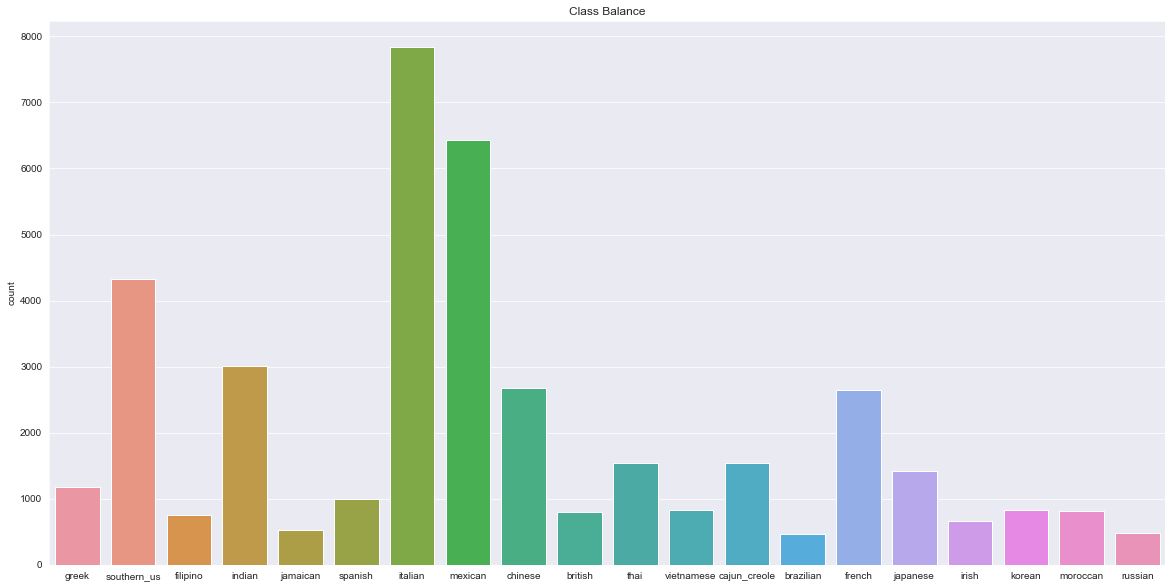

In [323]:
# Сформируем вектор ответов y и взглянем на баланс классов
y = np.array([recipe['cuisine'] for recipe in recipes])

plt.figure(figsize = (20, 10))
plt.title('Class Balance')
sns.countplot(y);

Теперь все готово. Мы имеем матрицу признаков распределения вероятностей тем в документе и целевую переменную тип кухни. Теперь попробуем по теме предсказывать кухню

In [294]:
# Убедимся, что размерности совпадают
x.shape, y.shape

((39774, 40), (39774,))

In [298]:
rm_forest_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

score = cross_val_score(rm_forest_model, x, y, cv=3, scoring='accuracy')
print('Mean Score: ', score.mean())

Mean Score:  0.5379644994217327


Видно, что классификатор не очень справляется. Чуть лучше генератора случайных чисел или монетки. Однако, это всеравно неплохой показатель, учитывая такое большое количество классов. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

In [324]:
# Сохраним результаты
def save_answers5(accuracy):
     with open("recipes_LDA_task5.txt", "w") as file:
        file.write(str(accuracy))
        
save_answers5(score.mean())

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [330]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [342]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pd.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pd.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pd.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [343]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(tc_matrix, square=True)

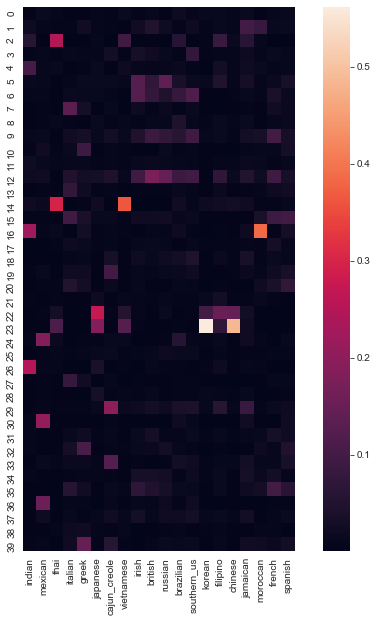

In [344]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(lda_model_2, corpus2, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 